In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns 

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X = df.iloc[:, :-1]
y = label_encoder.fit_transform(df.iloc[:, -1])
print(X, y)
# print(label_encoder.inverse_transform([1]))

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [49]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

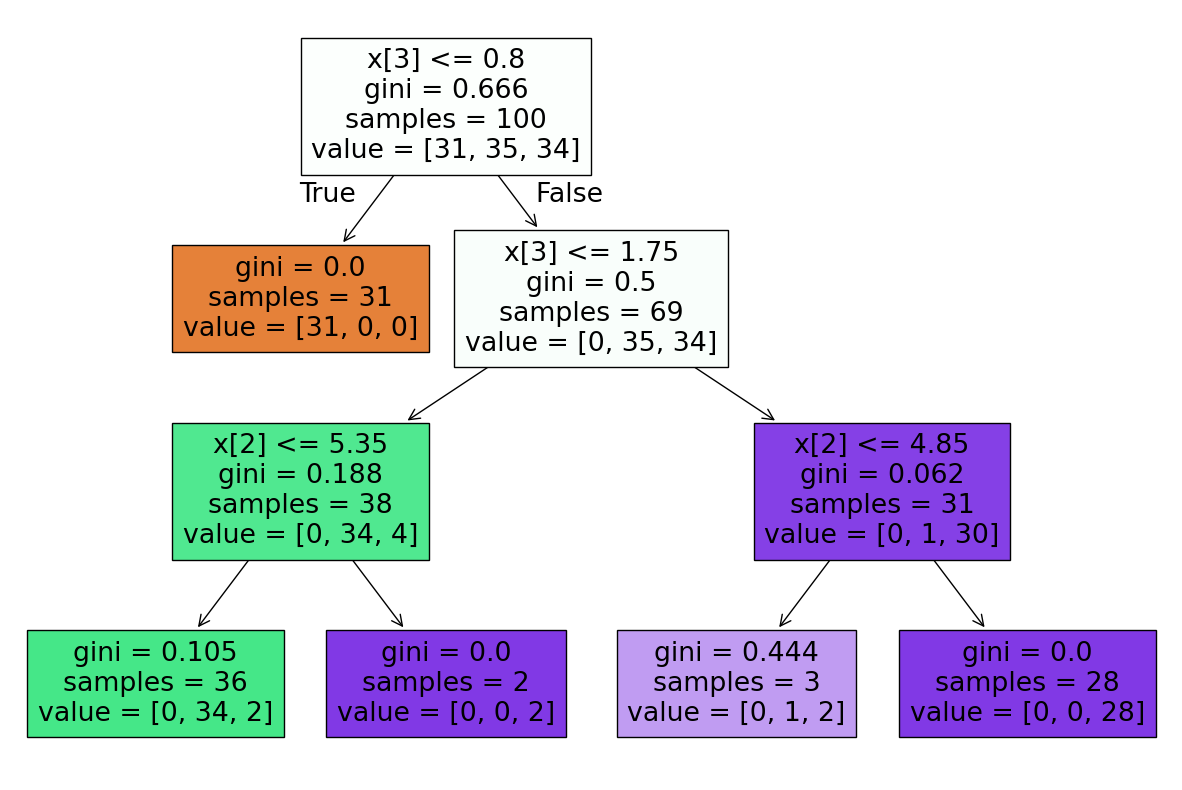

In [51]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model, filled=True)

In [52]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = tree_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Pre pruning

In [53]:
treemodel = DecisionTreeClassifier()

parameter = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [3, 4, 5, None],
    "max_features": [None, "sqrt", "log2"],
    "ccp_alpha": [0.0, 0.001, 0.01, 0.05, 0.1]
}

In [54]:
from sklearn.model_selection import GridSearchCV 

cv = GridSearchCV(treemodel, param_grid=parameter, cv=5, scoring="accuracy")
cv.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 4, ...], 'max_features': [None, 'sqrt', ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [55]:
cv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [56]:
y_pred = cv.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.60      0.75        25
           2       0.38      1.00      0.55         6

    accuracy                           0.80        50
   macro avg       0.79      0.87      0.77        50
weighted avg       0.93      0.80      0.82        50

